In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
_df = pd.read_json('news_data.json', lines = True)
df = _df.drop(_df.columns[[0,4,5]], axis = 1)

In [4]:
df

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...
...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr..."
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked..."
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...


In [5]:
target_category = df['category'].unique()
print(target_category)

['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


## From Object to text

In [6]:
df['category'] = df['category'].astype('string')
df['headline'] = df['headline'].astype('string')
df['short_description'] = df['short_description'].astype('string')

In [8]:
df['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

## Merging similar classes

In [9]:
# for index, row in df.iterrows():
#     i = df['category'].at[index]
    
#     if(i == "COMEDY"):
#         df['category'].at[index] = "ENTERTAINMENT" 
        
#     if(i == "LATINO VOICES" or i=="QUEER VOICES" or i=="BLACK VOICES"):
#         df['category'].at[index] = "MINORITY"
        
#     if(i == "ARTS & CULTURE" or i=="ARTS"):
#         df['category'].at[index] = "CULTURE & ARTS"
        
#     if(i == "COLLEGE"):
#         df['category'].at[index] = "EDUCATION"
        


    
# # check that the species were converted correctly
# df['category'].unique()
# df['category'].value_counts()

# Removing useless words

In [11]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from nltk.tokenize import sent_tokenize
# print(stopwords.words('english'))

def remove_stopword(text):
    stop_word = set(stopwords.words('english'))
#     words = word_tokenize(text)
    return  " ".join([x for x in text.split() if x not in stop_word])


df['short_description'] = df['short_description'].apply(remove_stopword)




0         health experts said early predict whether dema...
1         subdued passengers crew fled back aircraft con...
2                       "until dog understand could eaten."
3         "accidentally put grown-up toothpaste toddler’...
4         amy cooper accused investment firm franklin te...
                                ...                        
209522    verizon wireless at&t already promoting lte de...
209523    afterward, azarenka, effusive press normal, cr...
209524    leading super bowl xlvi, talked game could end...
209525    correction: earlier version story incorrectly ...
209526    five-time all-star center tore teammates frida...
Name: short_description, Length: 209527, dtype: object

In [12]:
# df['categoryId'] = df['category'].factorize()[0]
# df.head()
# df

In [13]:
def special_char(text):
    reviews = ''
    
    for x in text:
        if(x == " "):
            reviews += " "
            
        elif(x.isalnum()):
            reviews += x
            
    return reviews

df['short_description'] = df['short_description'].apply(special_char)

In [14]:
# df[df['category'] == "green"]['headline']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = CountVectorizer(stop_words='english')

# vec = TfidfVectorizer(min_df=1, lowercase=False)
vec = CountVectorizer(min_df=1, lowercase=False)

print("First row avaliable words")
print((vec.fit_transform(df['short_description'])[0,0:]))

First row avaliable words
  (0, 38837)	1
  (0, 29987)	1
  (0, 73378)	1
  (0, 27042)	1
  (0, 66470)	1
  (0, 92261)	1
  (0, 23502)	1
  (0, 93395)	1
  (0, 52549)	1
  (0, 802)	1
  (0, 54512)	1
  (0, 25958)	1
  (0, 58022)	1
  (0, 12579)	1
  (0, 89334)	1
  (0, 61072)	1
  (0, 30551)	1


In [16]:
print("Words: keys")
# vec.get_feature_names_out()
# vec.vocabulary_

Words: keys


In [17]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
labelEncode = le.fit(df["category"])
print(labelEncode.classes_)         #prints labels by order as fitted in encoder
label = labelEncode
labelEncode = le.fit_transform(df["category"])

print("LabelEncode")
print(labelEncode)

categorical_y = to_categorical(labelEncode)
print("\n To_Categorical one hot encode")
print(categorical_y)

['arts' 'arts & culture' 'black voices' 'business' 'college' 'comedy'
 'crime' 'culture & arts' 'divorce' 'education' 'entertainment'
 'environment' 'fifty' 'food & drink' 'good news' 'green' 'healthy living'
 'home & living' 'impact' 'latino voices' 'media' 'money' 'parenting'
 'parents' 'politics' 'queer voices' 'religion' 'science' 'sports' 'style'
 'style & beauty' 'taste' 'tech' 'the worldpost' 'travel' 'u.s. news'
 'weddings' 'weird news' 'wellness' 'women' 'world news' 'worldpost']
LabelEncode
[35 35  5 ... 28 28 28]

 To_Categorical one hot encode
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
label.classes_

array(['arts', 'arts & culture', 'black voices', 'business', 'college',
       'comedy', 'crime', 'culture & arts', 'divorce', 'education',
       'entertainment', 'environment', 'fifty', 'food & drink',
       'good news', 'green', 'healthy living', 'home & living', 'impact',
       'latino voices', 'media', 'money', 'parenting', 'parents',
       'politics', 'queer voices', 'religion', 'science', 'sports',
       'style', 'style & beauty', 'taste', 'tech', 'the worldpost',
       'travel', 'u.s. news', 'weddings', 'weird news', 'wellness',
       'women', 'world news', 'worldpost'], dtype=object)

In [19]:
# he 
# arr = vec.transform(df['category'].iloc[45:433]).toarray()[0]

# unique_elements, counts_elements = np.unique(arr, return_counts=True)
# print("Frequency of unique values of the said array:")
# print(np.asarray((unique_elements, counts_elements)))


In [41]:
from sklearn.model_selection import train_test_split

x = vec.fit_transform(df['short_description'])
x.sort_indices()
x_train, x_test, y_train, y_test = train_test_split(x, categorical_y, test_size = 0.1, random_state = 2, stratify = categorical_y)
print(x_train.shape[0])
print(x_test.shape[0])
print(categorical_y)

# print("First row sorted word map")
# print(x[0,0:])

188574
20953
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
from sklearn.utils import class_weight
class_weights = generate_class_weights(categorical_y)

class_weights 



{0: 3.305989460065007,
 1: 3.725719264554216,
 2: 1.0885311139511444,
 3: 0.8325664377900693,
 4: 4.360785048285048,
 5: 0.9238403880070547,
 6: 1.4005441030988477,
 7: 4.645007537465638,
 8: 1.4561407166485976,
 9: 4.919860054475439,
 10: 0.2873366026516585,
 11: 3.4548047750956337,
 12: 3.560840895958669,
 13: 0.7868672074508036,
 14: 3.5684821854349753,
 15: 1.9026461080236825,
 16: 0.7452551680965186,
 17: 1.1548004850088183,
 18: 1.431899568093598,
 19: 4.414812473662031,
 20: 1.6945441899585922,
 21: 2.840967024623061,
 22: 0.5674824360411893,
 23: 1.261374992474866,
 24: 0.14012522035947686,
 25: 0.7859993847862132,
 26: 1.9358704288855628,
 27: 2.261440659672754,
 28: 0.9826153427689768,
 29: 2.213282207292855,
 30: 0.5083287237862335,
 31: 2.380123137041076,
 32: 2.3710732391816043,
 33: 1.3615551569972968,
 34: 0.5039129389129389,
 35: 3.6229034823806066,
 36: 1.3656551040892677,
 37: 1.7964487199272938,
 38: 0.2780015656304316,
 39: 1.396623206953554,
 40: 1.5121970582716264

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.losses import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow.keras import regularizers


model = Sequential()


# model.add(Dense(
#     units=164,
#     activation = "relu",

#     kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
#     bias_regularizer=regularizers.L2(1e-4),
#     activity_regularizer=regularizers.L2(1e-5),
#     input_dim=x_train.shape[1]
# ))

model.add(Dense(units=164,activation="relu", input_dim=x_train.shape[1]))
# model.add(Dense(units=124,activation="relu"))


# model.add(Dense(units=1208,activation="relu"))


model.add(Dense(
    units=164,
    activation = "relu",
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-5),
    bias_regularizer=regularizers.L1(1e-5),
    activity_regularizer=regularizers.L1(1e-5)
))



# model.add(Dense(units = 150, input_dim=2, activation='relu', activity_regularizer=l1(0.01)))
# # model.add(Dense(units=28,activation="relu", input_dim=x_train.shape[1]))
# model.add(Dense(units=64,activation="relu"))
# model.add(Dense(units=64,activation="relu"))
# model.add(Dense(units=64,activation="relu"))
# model.add(Dense(units=64,activation="relu"))


model.add(Dense(units=y_test.shape[1], activation="softmax"))

optimizer = Adam(learning_rate=0.01)

model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)

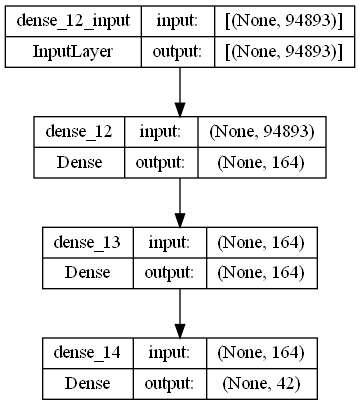

In [43]:
ann_model = model
plot_model(model,show_shapes=True)

In [44]:
ann_history = ann_model.fit(x_train,y_train,epochs=7,batch_size=128, class_weight = class_weights )
# ypred = ann_model.predict(x_test)
#ann_history.summary()

Epoch 1/7
1474/1474 [==============================] - 254s 172ms/step - loss: 2.8989 - accuracy: 0.2604
Epoch 2/7
1474/1474 [==============================] - 273s 185ms/step - loss: 2.1450 - accuracy: 0.3875
Epoch 3/7
1474/1474 [==============================] - 275s 186ms/step - loss: 1.6461 - accuracy: 0.4991
Epoch 4/7
1473/1474 [============================>.] - ETA: 0s - loss: 1.3573 - accuracy: 0.5803

KeyboardInterrupt: 

### Give your own input

In [ ]:
data = vec.transform(["Price of houses"])

In [ ]:
pred= ann_model.predict(data)

In [ ]:
# pred.index(max(pred)) for simple array'
temp = pred.argmax()

print(np.amax(pred))
print(pred.argmax())
print(le.inverse_transform([pred.argmax()]))

# Evaluation

In [45]:
y_pred_test_cont = ann_model.predict(x_test)
y_pred_train_cont = ann_model.predict(x_train)

5893/5893 [==============================] - 9s 2ms/step


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score# bin_classif = cont_to_bin(ypred)

# to binary
y_pred_train_count = cont_to_bin(y_pred_train_cont)
y_pred_test_count = cont_to_bin(y_pred_test_cont)


# inverse count vector
y_test = vec.inverse_transform(y_test)
x_test = vec.inverse_transform(x_test)

y_pred_train = vec.inverse_transform(y_pred_train_count)
y_pred_test = vec.inverse_transform(y_pred_test_count)

score = f1_score(y_test, y_pred_test,average = 'weighted')

print("Weighted F1-Score: ", score)

Weighted F1-Score:  0.33123231525589236


## Eval metric

In [47]:
Precision = precision_score(y_test, y_pred_test, average = None)
Recall = recall_score(y_test, y_pred_test, average= None)
score = f1_score(y_test, y_pred_test,average = None)


data = {'Category':label.classes_,'Recall':Recall,'Precision':Precision,'F1':score}

eval_df = pd.DataFrame(data)

eval_df

,Category,Recall,Precision,F1
0,arts,0.490066,0.035238,0.065749
1,arts & culture,0.111940,0.076142,0.090634
2,black voices,0.237991,0.200000,0.217348
3,business,0.242070,0.268022,0.254386
4,college,0.157895,0.163636,0.160714
5,comedy,0.196296,0.193078,0.194674
6,crime,0.289326,0.211499,0.244365
7,culture & arts,0.196262,0.134615,0.159696
8,divorce,0.466472,0.462428,0.464441
9,education,0.148515,0.258621,0.188679


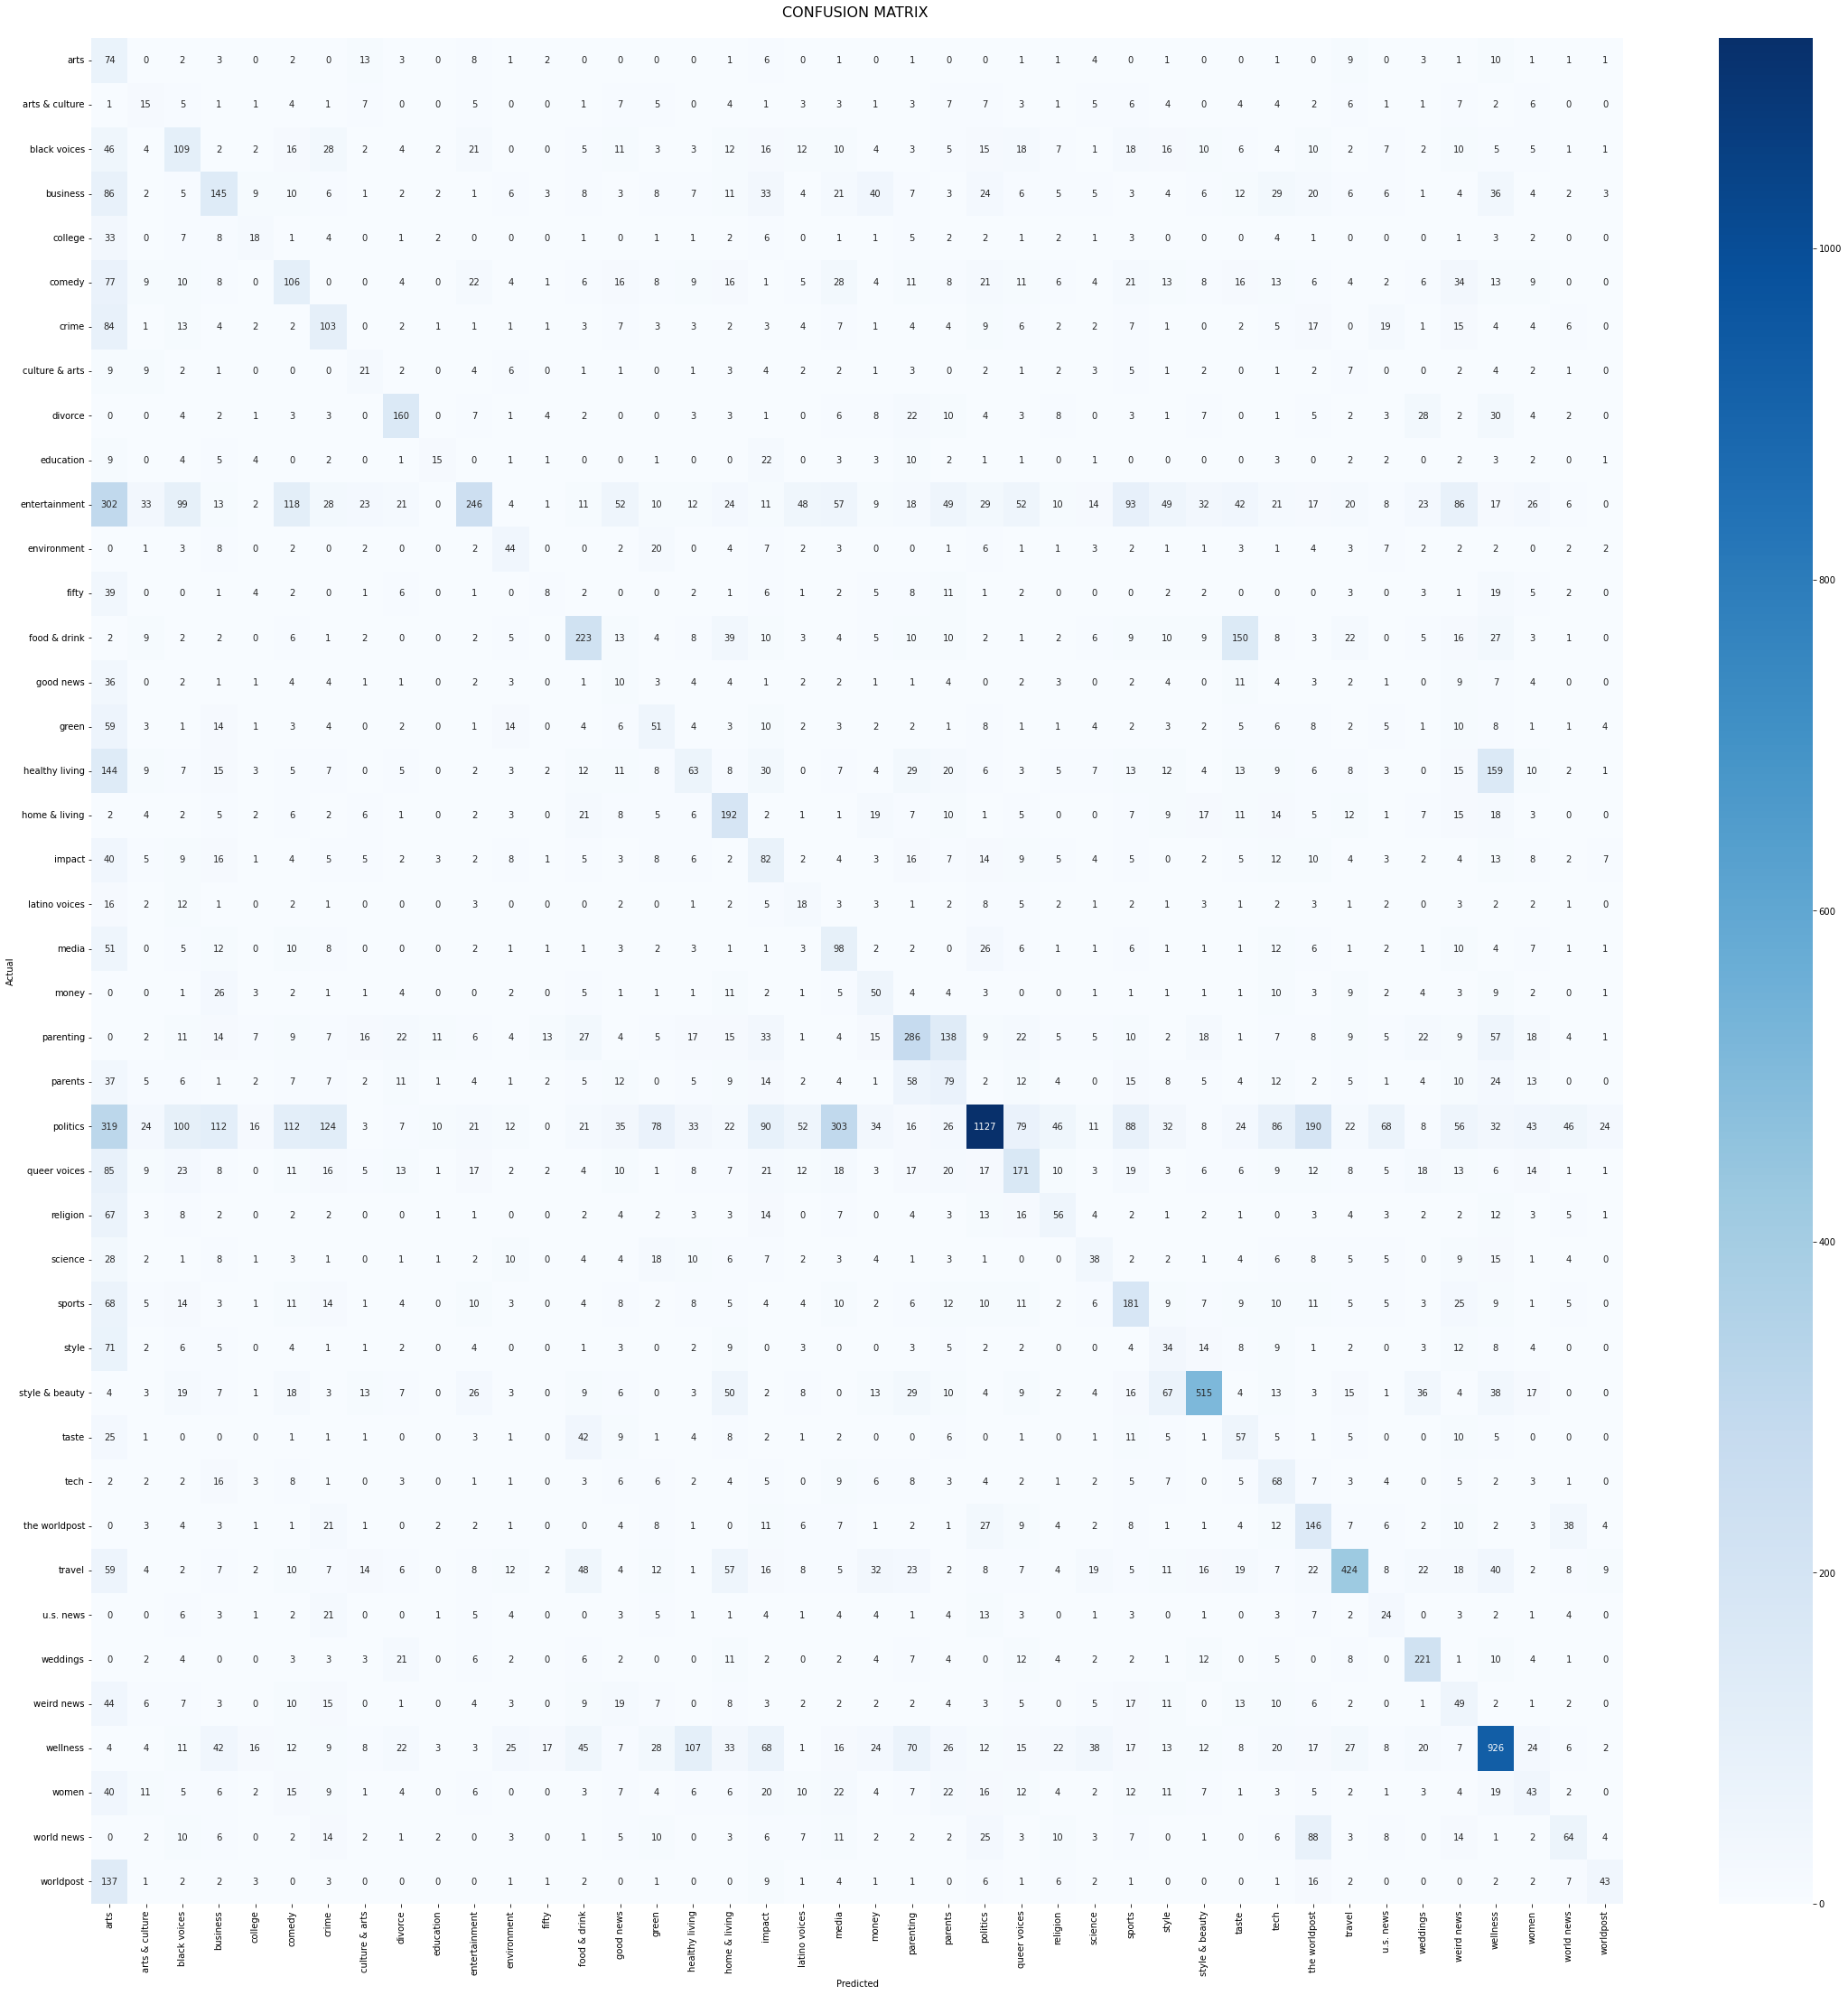

In [48]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix



conf_mat = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(38,38))

sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=label.classes_, 
            yticklabels=label.classes_)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX \n", size=16);

In [27]:
def cont_to_bin(_2darr):
    #make an 2d array
    final2d = np.empty(_2darr.shape,dtype = int)
    
    #iterate over each row
    for i in range(0,_2darr.shape[0]):
        #find greatest element
        row = _2darr[i]
        index = row.argmax()
        
        #make an array
        temp = np.zeros( row.size )
        temp[index] = 1
        final2d[i] = temp
        
    return final2d

# bin_classif = cont_to_bin(ypred_2)
# np.apply_along_axis(function, 1, array)


In [26]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MultiLabelBinarizer


def generate_class_weights(class_series, multi_class=True, one_hot_encoded=True):
    if multi_class:
        # If class is one hot encoded, transform to categorical labels to use compute_class_weight   
        if one_hot_encoded:
            class_series = np.argmax(class_series, axis=1)

        # Compute class weights with sklearn method
        class_labels = np.unique(class_series)
        class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=class_series)
        return dict(zip(class_labels, class_weights))
    else:
        # It is neccessary that the multi-label values are one-hot encoded
        mlb = None
        if not one_hot_encoded:
            mlb = MultiLabelBinarizer()
            class_series = mlb.fit_transform(class_series)

        n_samples = len(class_series)
        n_classes = len(class_series[0])

        # Count each class frequency
        class_count = [0] * n_classes
        for classes in class_series:
            for index in range(n_classes):
                if classes[index] != 0:
                    class_count[index] += 1

        # Compute class weights using balanced method
        class_weights = [n_samples / (n_classes * freq) if freq > 0 else 1 for freq in class_count]
        class_labels = range(len(class_weights)) if mlb is None else mlb.classes_
        return dict(zip(class_labels, class_weights))